In [1]:
import scipy
from math import *
import matplotlib.pyplot as plt
from functools import *
import random

import numpy as np
import pandas as pd
from time import sleep

# 1 - L'optimisation par essaims particulaires - Cas continu

> 1.1 Codage, compréhension et voisinage

Nous allons tester l'algorithme dans un cas continu (fonctions [sphère](http://www.sfu.ca/~ssurjano/spheref.html), [griewank](http://www.sfu.ca/~ssurjano/griewank.html))

In [2]:
def sphere(sol):
    return reduce(lambda acc,x:acc+x**2,sol,0)

def griewank(sol):
    (s,p,i) = reduce(lambda acc,e:(acc[0]+e*e,acc[1]*cos(e/sqrt(acc[2])),acc[2]+1),sol,(0,1,1))
    return s/4000

In [3]:
# create a particle 
# one particle is discribed by : 
#   - pos : solution list of variables
#   - vit : movement velocity (null at the initialization)
#   - fit :  fitness of the solution
#   - bestpos : best visited position 
#   - bestfit : evaluation of the best visited solution
#   - bestvois : best neighbor (global for this version)

def init_one(dim,inf,sup,eval):
    pos = [random.uniform(inf,sup) for _ in range(dim)]
    fit = eval(pos)
    return {'vit':[0]*DIM, 'pos':pos, 'fit':fit, 'bestpos':pos, 'bestfit':fit, 'bestvois':[]}

init_one(4,0,2,eval = lambda sol : sphere(sol))

NameError: ignored

## Exercice 1.

### a. Coder l'algorithme en considérant, pour l'équation de la vitesse, un voisinage global (toutes les particules sont des informatrices et le meilleur individu pour le voisinage d'une particule est le meilleur individu de l'essaim).

In [ ]:
# Init of the population (swarm)
def init_swarm(nb,dim,inf,sup,eval):
	return [init_one(dim,inf,sup,eval) for _ in range(nb)]

swarm_test = init_swarm(5,3,0,5,eval = lambda sol : sphere(sol))
swarm_test

[{'vit': [0, 0, 0, 0],
  'pos': [2.4854917162383017, 3.861982393220678, 4.103747096198937],
  'fit': 37.93331730659695,
  'bestpos': [2.4854917162383017, 3.861982393220678, 4.103747096198937],
  'bestfit': 37.93331730659695,
  'bestvois': []},
 {'vit': [0, 0, 0, 0],
  'pos': [3.2908903996610306, 3.3159816960533135, 3.5089348241431417],
  'fit': 34.1383178312262,
  'bestpos': [3.2908903996610306, 3.3159816960533135, 3.5089348241431417],
  'bestfit': 34.1383178312262,
  'bestvois': []},
 {'vit': [0, 0, 0, 0],
  'pos': [3.634748540975486, 0.6521027887561598, 1.1562995497959911],
  'fit': 14.973663652085396,
  'bestpos': [3.634748540975486, 0.6521027887561598, 1.1562995497959911],
  'bestfit': 14.973663652085396,
  'bestvois': []},
 {'vit': [0, 0, 0, 0],
  'pos': [3.4908500714638886, 4.546702254400798, 0.6469119723387778],
  'fit': 33.27703071156798,
  'bestpos': [3.4908500714638886, 4.546702254400798, 0.6469119723387778],
  'bestfit': 33.27703071156798,
  'bestvois': []},
 {'vit': [0, 0, 

In [ ]:
DIM = 4 # problem dimension
INF = -600
SUP = 600

ITERMAX = 2000
NB_PARTICULES = 20

# usual params
psi,cmax = (0.7, 1.47) #(0.8, 1.62)

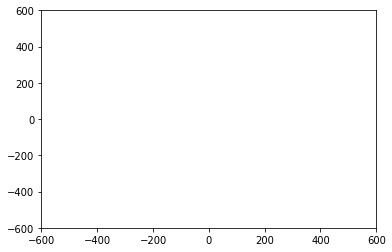

In [ ]:
# Creating the the figure
fig1 = plt.figure()
canv = fig1.add_subplot(1,1,1)
canv.set_xlim(INF,SUP)
canv.set_ylim(INF,SUP)
pZoom = 1.0 # zoom setting

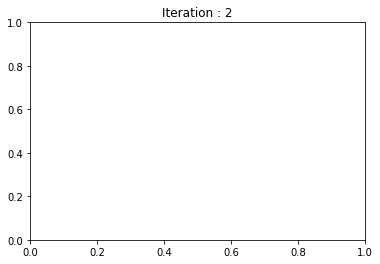

In [ ]:
# Trace les deux premieres coordonnees des particleules
# pre-conditions :
#   - swarm : all particles,
#   - n_cycle : number of iteration
def draw(swarm, n_cycle):
    global canv
    # zoom centred on zero
    m,M = canv.get_xlim()
    canv.clear()
    canv.set_xlim(m*pZoom,M*pZoom)
    canv.set_ylim(m*pZoom,M*pZoom)
    # showing the first two dimensions of each particle
    for p in swarm:	
    	canv.plot(p['pos'][0],p['pos'][1],'ro')
    plt.title("Iteration : {}".format(n_cycle))

draw(swarm_test, 2)

In [ ]:
def OEP_Algorith():
    pass

### b. Ajouter les fonctions [Rosenbrock] et [Schwefel](http://www.sfu.ca/~ssurjano/schwef.html).

- https://en.wikipedia.org/wiki/Test_functions_for_optimization
- http://www.sfu.ca/~ssurjano/optimization.html

#### c. Écrire une fonction bornage qui gère les problèmes aux limites de l'espace de recherche, lors du déplacement. Choisissez une ou plusieurs stratégies.
### d. Tester l'algorithme avec ses différentes valeurs de paramètres.

### e. Pour simplifier son paramétrage, essayer de trouver une relation convenable entre le nombre de particules, le nombre de cycles et la dimension.

### f. L'équation de la vitesse prend en compte le voisinage global.Écrire une fonction majlocal qui permet de sélectionner nbuvoisins en tant qu'informatrices. 

Pour simplifier, nous choisirons les informatrices proches de la particule selon leur position dans la liste, c'est un voisinage social.

velocity c'est ue vitesse
